In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_o = str(os.getcwd()).split("\\")
path_o = "\\".join(path_o[:-1])

##### Industria cinematográfica: Ingresos de taquilla de Películas entre 1970 - 2022

#### Análisis Exploratorio de Datos (EDA)

El siguiente EDA se llevará a cabo con un dataset de películas comprendio entre el año 1970 - 2022. Con dicho EDA, se corroborará las siguientes hipotésis:
- Películas con mayor ingreso contan de más presupuesto, correlación significativa enre presupuesto e ingresos de taquilla (mayor a 0.5)
- EL ingreso de taquilla en promedio de las películas que se estrenaron en los años 2020 y 2021, son los menores con respecto a los demás años
- Películas que se estrenaron a mitad y a fin de año, obtuvieron mayores ingresos.
- El genero de accion genera más ganancias.

Se toma el csv 'data_clean_2EDA.csv" y  se lee. Este dataset está limpio, no existe ningún valor NAN.

In [3]:
os.chdir(path_o+"\\data\\raw")
df = pd.read_csv("data_clean_2_EDA.csv", index_col=0)
df["release_date"] = pd.to_datetime(df["release_date"])
df.head()

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,crew,cast,keywords,title,year,month,day,market_share_genres,genres_all,production_companies_all,production_countries_all,spoken_languages_all,keywords_all,cast_all,people_vaccinated,people_fully_vaccinated,total_boosters,New_cases,New_deaths
0,7.405126e+07,Action,11.773,Ross Hunter Productions,United States of America,1970-05-29,7.441348e+08,137.0,Italian,George Seaton,Burt Lancaster,bomb,Airport,1970,5,29,0.141761,"['Action', 'Drama', 'Thriller']",['Ross Hunter Productions'],['United States of America'],"['Italian', 'English']","['bomb', 'based on novel or book', 'airport', ...","['Burt Lancaster', 'Dean Martin', 'Jean Seberg...",0.0,0.0,0.0,0.0,0.0
1,2.962050e+07,Adventure,13.786,Katzka-Loeb,United States of America,1970-01-01,3.850665e+07,144.0,English,Brian G. Hutton,Clint Eastwood,gold,Kelly's Heroes,1970,1,1,0.080776,"['Adventure', 'Comedy', 'War']","['Katzka-Loeb', 'Avala Film', 'Metro-Goldwyn-M...",['United States of America'],"['English', 'French', 'German']","['gold', 'world war ii', 'armor', 'campaign', ...","['Clint Eastwood', 'Telly Savalas', 'Don Rickl...",0.0,0.0,0.0,0.0,0.0
2,2.221538e+07,Adventure,25.768,APJAC Productions,United States of America,1970-04-23,1.406953e+08,95.0,English,Ted Post,James Franciscus,mutant,Beneath the Planet of the Apes,1970,4,23,0.080776,"['Adventure', 'Science Fiction', 'Mystery']","['APJAC Productions', '20th Century Fox']",['United States of America'],['English'],"['mutant', 'dystopia', 'astronaut', 'ape', 'wo...","['James Franciscus', 'Kim Hunter', 'Maurice Ev...",0.0,0.0,0.0,0.0,0.0
3,7.405126e+07,Adventure,7.547,Sir Nigel Films,United Kingdom,1970-10-29,1.110769e+07,125.0,German,Billy Wilder,Robert Stephens,loch ness monster,The Private Life of Sherlock Holmes,1970,10,29,0.080776,"['Adventure', 'Comedy', 'Crime', 'Mystery', 'R...","['Sir Nigel Films', 'United Artists', 'The Mir...",['United Kingdom'],"['German', 'French', 'Russian', 'English']","['loch ness monster', 'german spy', 'midgets']","['Robert Stephens', 'Colin Blakely', 'Genevièv...",0.0,0.0,0.0,0.0,0.0
4,1.110769e+08,Adventure,8.597,Cinema Center Films,United States of America,1970-12-14,2.337024e+08,139.0,English,Arthur Penn,Dustin Hoffman,based on novel or book,Little Big Man,1970,12,14,0.080776,"['Adventure', 'Western', 'Comedy', 'Drama']","['Cinema Center Films', 'Stockbridge-Hiller Pr...",['United States of America'],['English'],"['based on novel or book', 'indian territory',...","['Dustin Hoffman', 'Faye Dunaway', 'Chief Dan ...",0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 0 to 5339
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   budget                    5340 non-null   float64       
 1   genres                    5340 non-null   object        
 2   popularity                5340 non-null   float64       
 3   production_companies      5340 non-null   object        
 4   production_countries      5340 non-null   object        
 5   release_date              5340 non-null   datetime64[ns]
 6   revenue                   5340 non-null   float64       
 7   runtime                   5340 non-null   float64       
 8   spoken_languages          5340 non-null   object        
 9   crew                      5340 non-null   object        
 10  cast                      5340 non-null   object        
 11  keywords                  5340 non-null   object        
 12  title               

In [5]:
df.describe()

,budget,popularity,revenue,runtime,year,month,day,market_share_genres,people_vaccinated,people_fully_vaccinated,total_boosters,New_cases,New_deaths
count,5.340000e+03,5340.000000,5.340000e+03,5340.000000,5340.00000,5340.000000,5340.000000,5.340000e+03,5.340000e+03,5.340000e+03,5.340000e+03,5.340000e+03,5340.000000
mean,4.596159e+07,27.058185,1.341330e+08,109.035019,2000.69794,6.027715,15.223221,1.336089e-01,6.752140e+07,5.503713e+07,1.455176e+07,1.173075e+04,106.073034
std,5.328369e+07,131.090981,2.454373e+08,20.808821,11.36684,3.320093,8.569930,9.830210e-02,1.026076e+09,8.968295e+08,2.664458e+08,1.537938e+05,1109.447247
min,1.144947e+04,0.600000,1.132029e+01,41.000000,1970.00000,1.000000,1.000000,1.765991e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.452078e+06,9.593500,1.055499e+07,95.000000,1993.00000,3.000000,8.000000,5.146100e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.773229e+07,14.364000,4.579401e+07,105.000000,2003.00000,6.000000,15.000000,1.303839e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,6.096977e+07,24.321250,1.448808e+08,119.000000,2009.00000,9.000000,22.000000,1.929611e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,4.856936e+08,6587.056000,3.918002e+09,339.000000,2022.00000,12.000000,31.000000,6.345980e-01,1.963846e+10,1.770871e+10,6.571895e+09,4.013983e+06,16459.000000


Gracias al siguiente gráfico podemos ver una visión general de los datos, sus distribuciones, y posibles relaciones.

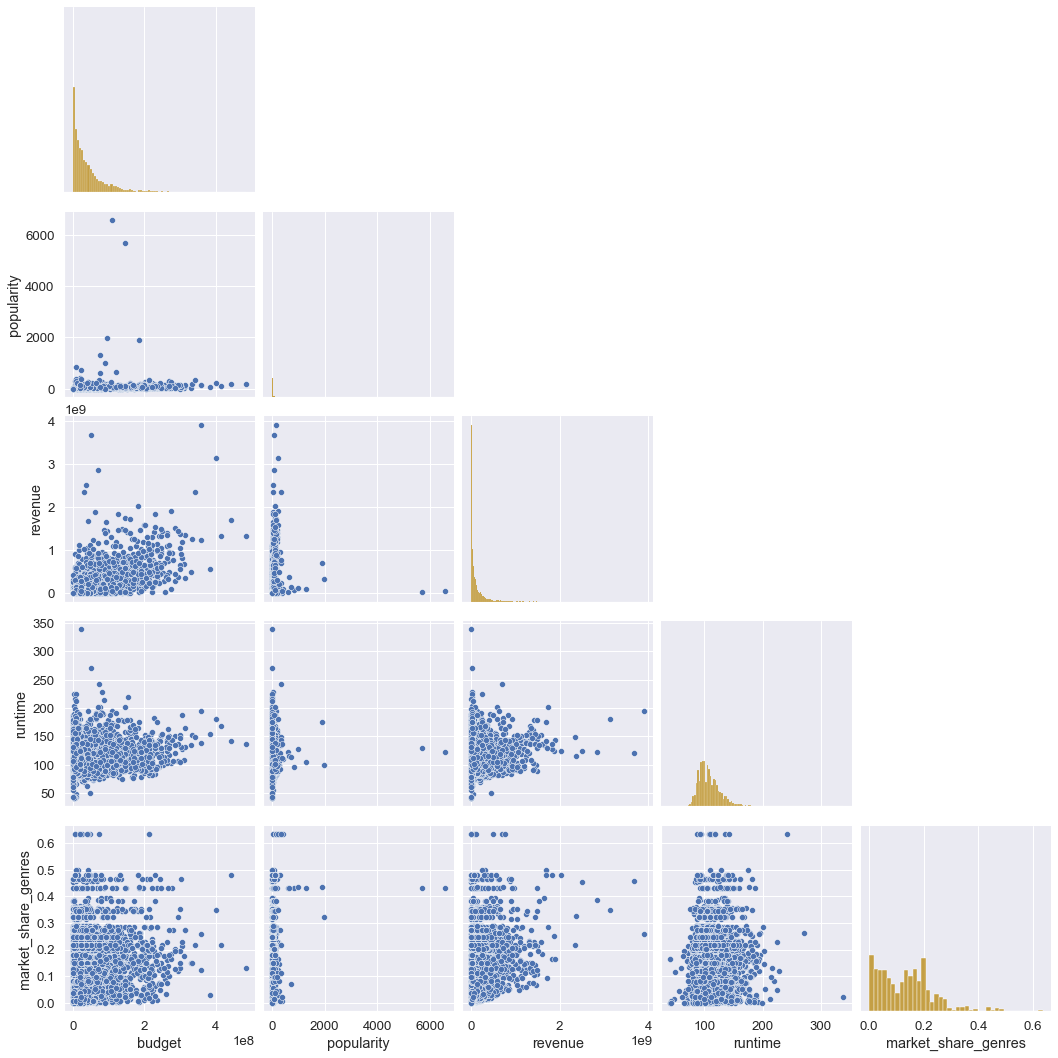

In [6]:
sns.set(font_scale = 1.2)
sns.pairplot(df[["budget", "popularity", "revenue", "runtime", "market_share_genres"]], corner=True, diag_kws= {'color': 'darkgoldenrod'}, size=3);

Las distribuciones de las columnas budget, popularity, revenue y runtime cuentan con una asimetría negativa. Ya que la cola de la distribución se encuentra extendida hacia la derecha de la mayor concentración de los datos.

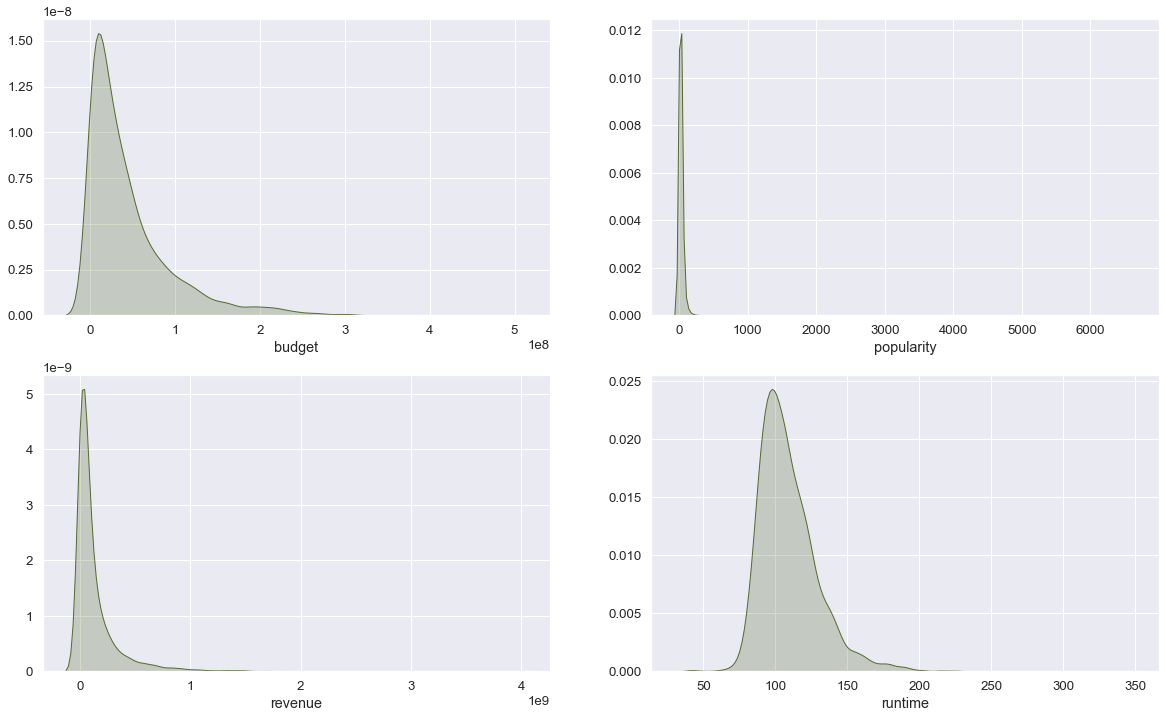

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()
sns.set(font_scale =1.8)
cols = ["budget", "popularity", "revenue", "runtime"]
for col, ax in zip(cols, axes):
    sns.kdeplot(data = df[col], shade=True, ax=ax, color="darkolivegreen")
    ax.set(ylabel=None)    

Ahora, vamos a observar los outliers del dataset. En los siguientes casos, existes datos que se encunntran fuera del rango intercuartil, precisamente superan el limite superior, a excepción de runtime, que tiene outliers a ambos lados del rango. Todas las modificaciones para estos datos se realizaron previamente, en el que se considera que los outliers que sobrepasan el limite superior no serán modificados o elimados, ya que podríamos eliminar información importante. Para el caso de la caso de 'runtime', para este caso se van a considerar todas aquellas películas que sean mayor de 40 minutros.

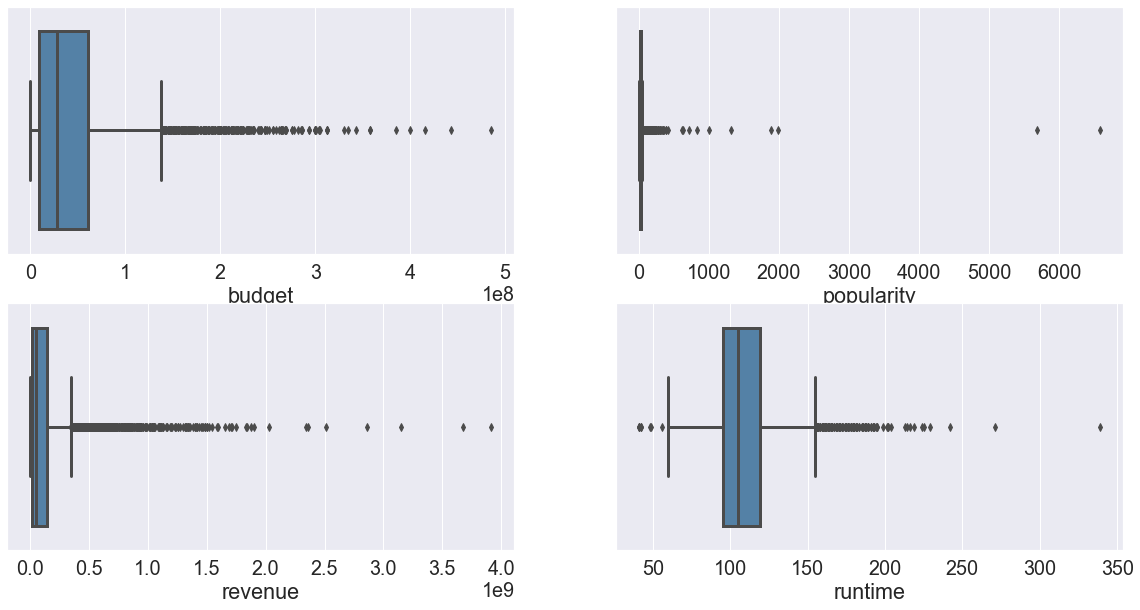

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.set(font_scale =1.6)
axes = axes.ravel()
cols = ["budget", "popularity", "revenue", "runtime"]
for col, ax in zip(cols, axes):
    sns.boxplot(x=df[col], ax=ax, linewidth=3, color="steelblue")


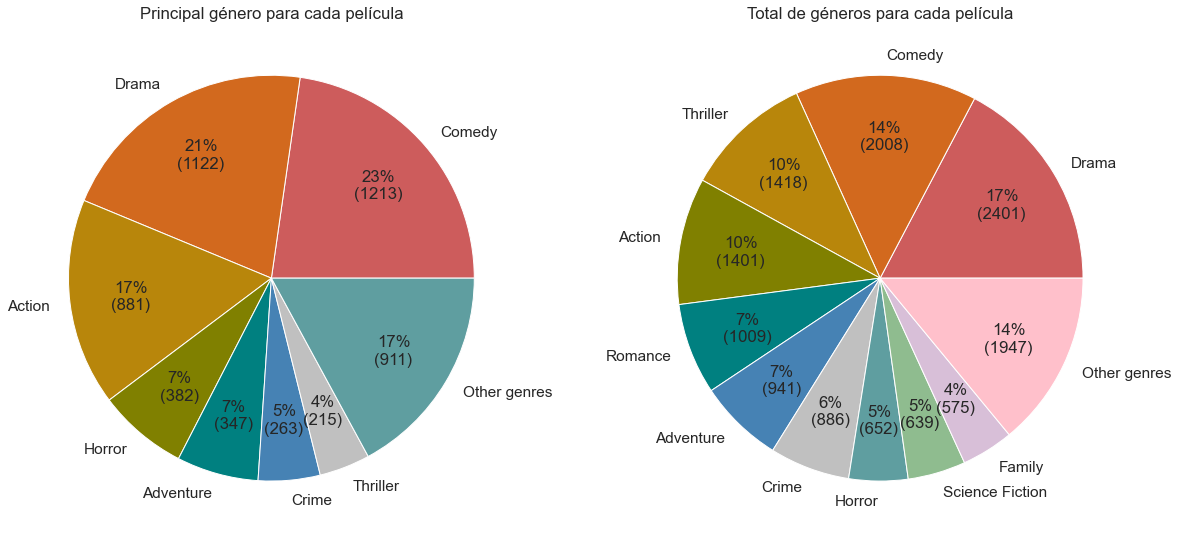

<Figure size 720x720 with 0 Axes>

In [9]:
sns.set(font_scale =1.4)

def func(pct, df):
    movies = int(pct/100.*np.sum(df))
    return "{:.0f}%\n({:d})".format(pct, movies)

def genres(df):
    df_genres = pd.DataFrame(df["genres"].value_counts().index.values, columns=["genres"])
    df_genres["count"]  = df["genres"].value_counts().values
    others = np.sum(df_genres.loc[7:, "count"].values)
    df_genres = df_genres.loc[:6]
    new_row = {"genres":"Other genres", "count":others}
    df_genres = df_genres.append(new_row, ignore_index=True)
    return df_genres

def genres_all(df):
    list_all_genres = []
    for i in df["genres_all"].values:
        list_genres = i[2:-2].split("', '")
        for j in list_genres:
            list_all_genres.append(j)

    df_all_genres = pd.DataFrame(list_all_genres, columns=["genres"])
    count = df_all_genres["genres"].value_counts().values
    df_all_genres = pd.DataFrame(df_all_genres["genres"].value_counts().index.values, columns=["genres"])
    df_all_genres["count"]  = count
    others2 = np.sum(df_all_genres.loc[10:, "count"].values)
    df_all_genres = df_all_genres.loc[:9]
    new_row2 = {"genres":"Other genres", "count":others2}
    df_all_genres = df_all_genres.append(new_row2, ignore_index=True)
    return df_all_genres

df_genres = genres(df)
df_all_genres = genres_all(df)

fig, axes = plt.subplots(1, 2, figsize= (20,10))
plt.figure(figsize=(10, 10))
colors = ["indianred","chocolate",'darkgoldenrod', 'olive', "teal", "steelblue", "silver", "cadetblue",'darkseagreen','thistle','pink']
axes[0].pie(df_genres["count"].values, labels=df_genres["genres"].values, autopct=lambda pct: func(pct, df_genres[["count"]]), pctdistance=0.7, colors=colors)
axes[0].set_title('Principal género para cada película')
axes[1].pie(df_all_genres["count"].values, labels=df_all_genres["genres"].values, autopct=lambda pct: func(pct, df_all_genres[["count"]]), pctdistance=0.7, colors=colors)
axes[1].set_title('Total de géneros para cada película');


Los gráficos pie o pastel muestran el porcentaje del total de películas agrupados por género principal (izquierda) o total (derecha). Total hace referencia a todos los géneros que pueden estar comprendidos en cada película. Se puede evidenciar que el Drama y la Comedia son los generos con más peliculas.

Por otro lado, Universal Pictures es la compañia principal de producción de las películas en el dataset en analísis. Y en total, ya que varias compañias de producción pueden ser parte de una misma película, Warner Bros. Pictures y Universal Pictures, son las compañias que más participación tienen.

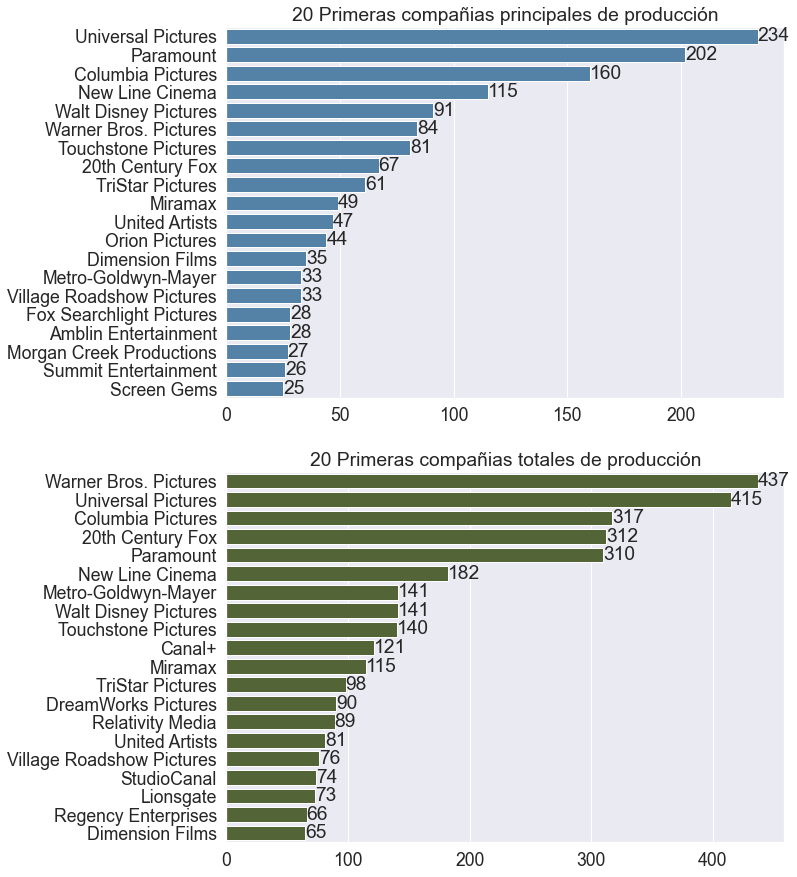

In [10]:
sns.set(font_scale =1.6)
list_all_companies = []
for i in df["production_companies_all"].values:
    list_companies = i[2:-2].split("', '")
    for j in list_companies:
        list_all_companies.append(j)
df_all_production_companies = pd.DataFrame(list_all_companies, columns=["production_companies"])
df_all_production_companies = df_all_production_companies[df_all_production_companies["production_companies"].isin(df_all_production_companies["production_companies"].value_counts().sort_values(ascending=False).head(20).index.values)]

df1_production_companies = df[df["production_companies"].isin(df["production_companies"].value_counts().sort_values(ascending=False).head(20).index.values)]
fig, axes = plt.subplots(2, 1, figsize= (10,15))
ax = sns.countplot(data= df1_production_companies,
                y ="production_companies", 
                color="steelblue",
                order = df1_production_companies['production_companies'].value_counts().index,
                ax=axes[0])

abs_values = df1_production_companies['production_companies'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title("20 Primeras compañias principales de producción")
ax.set(xlabel=None, ylabel=None)
                
ax1 =sns.countplot(data= df_all_production_companies,
                y="production_companies",
                color="darkolivegreen",
                order = df_all_production_companies['production_companies'].value_counts().index, 
                ax=axes[1])
abs_values1 = df_all_production_companies['production_companies'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs_values1)
ax1.set_title("20 Primeras compañias totales de producción")
ax1.set(xlabel=None, ylabel=None);

Con respecto a los países de producción, Estados Unidos es el país tanto principal como total, con mayor producción de películas. Al igual que con las compañias, algunas películas son grabadas en diferentes países.

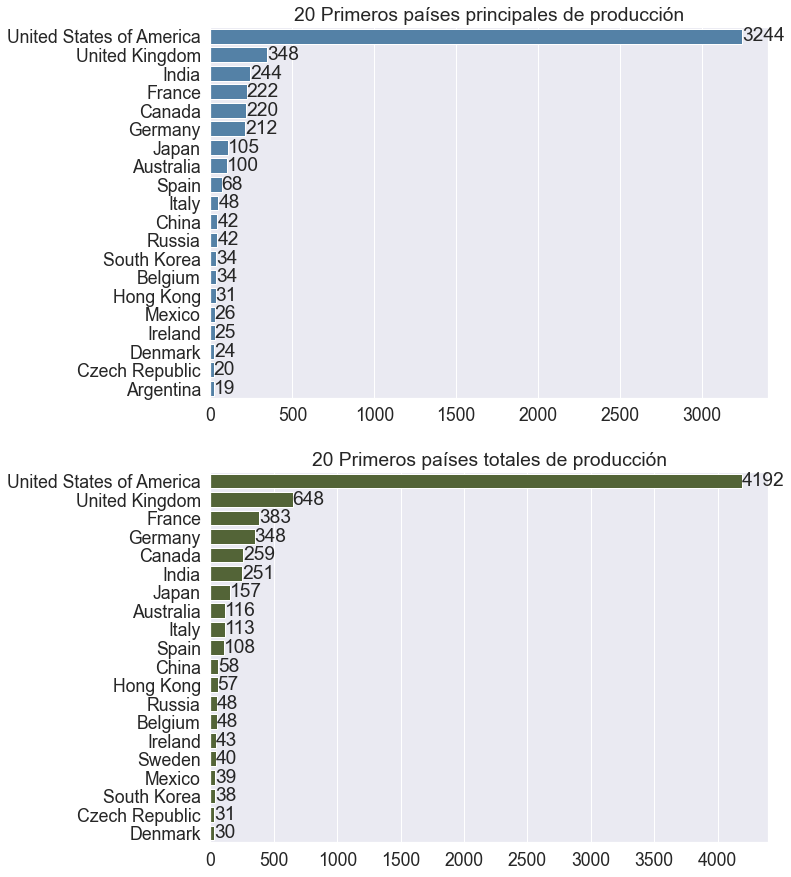

In [11]:
sns.set(font_scale =1.6)
list_all_countries = []
for i in df["production_countries_all"].values:
    list_countries = i[2:-2].split("', '")
    for j in list_countries:
        list_all_countries.append(j)
df_all_production_countries = pd.DataFrame(list_all_countries, columns=["production_countries"])
df_all_production_countries = df_all_production_countries[df_all_production_countries["production_countries"].isin(df_all_production_countries["production_countries"].value_counts().sort_values(ascending=False).head(20).index.values)]

df1_production_countries = df[df["production_countries"].isin(df["production_countries"].value_counts().sort_values(ascending=False).head(20).index.values)]
fig, axes = plt.subplots(2, 1, figsize= (10,15))
ax = sns.countplot(data= df1_production_countries,
                y ="production_countries", 
                color="steelblue",
                order = df1_production_countries['production_countries'].value_counts().index,
                ax=axes[0])

abs_values = df1_production_countries['production_countries'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title("20 Primeros países principales de producción")
ax.set(xlabel=None, ylabel=None)
                
ax1 =sns.countplot(data= df_all_production_countries,
                y="production_countries",
                color="darkolivegreen",
                order = df_all_production_countries['production_countries'].value_counts().index, 
                ax=axes[1])
abs_values1 = df_all_production_countries['production_countries'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs_values1)
ax1.set_title("20 Primeros países totales de producción")
ax1.set(xlabel=None, ylabel=None);

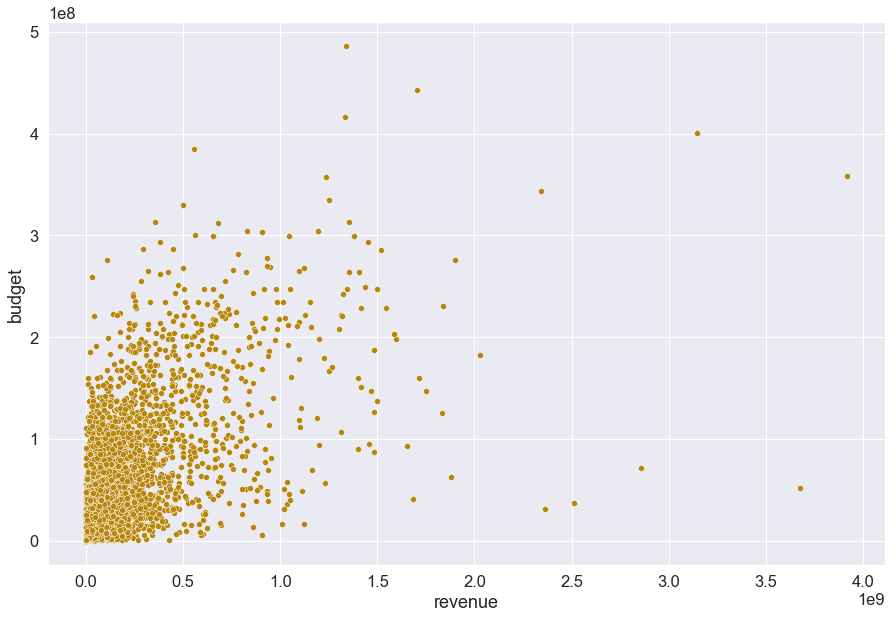

In [23]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="revenue", y="budget", color = "darkgoldenrod");

En los gráficos budget vs revenue, se puede apreciar que los datos se ajustan a una recta, en que esta tiene una pendiente positiva, lo que nos indica que los datos que se encuentran cerca a aquella línea de regresión se correlacionan positivamente, aquello lo podemos corroborar con el siguiente heatmap con un mapa de correlaciones entre las variables, y se observa que existe una correlación positiva (0.62), es decir, que en la mayoría de los registros de las películas, aquellas que obtuvieron un mayor ingreso de taquilla es debido a su presupuesto.

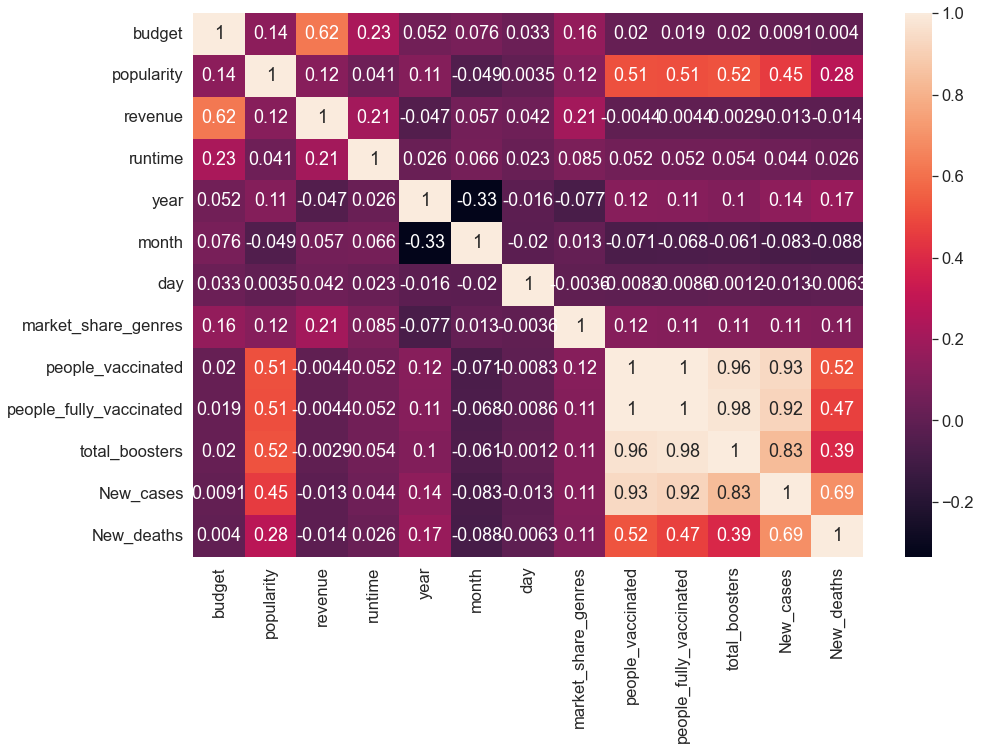

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

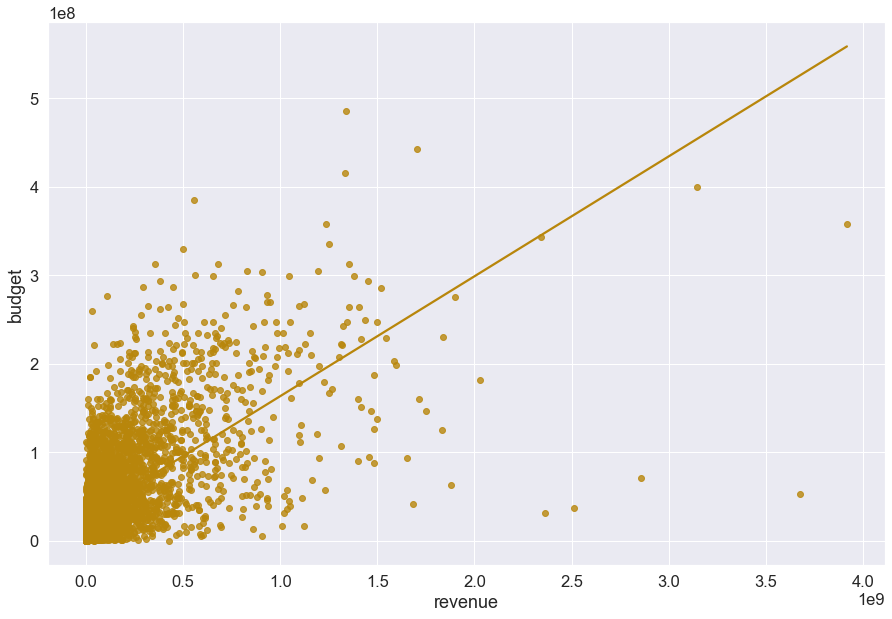

In [28]:
plt.figure(figsize=(15, 10))
sns.regplot(data=df, x="revenue", y="budget", color = "darkgoldenrod", ci=None);

A continuación se observa en el siguiente scatterplot con información en el eje X, los años, y en el eje Y, hace referencia al ingreso de todas las peliculas de ese año por minuto de duración, restando el presupuesto. Cabe resaltar que todas las variables o columnas que son cifras de dinero, como por ejemplo, revenue y budget, fueron infladas hasta el año actual (2022). 

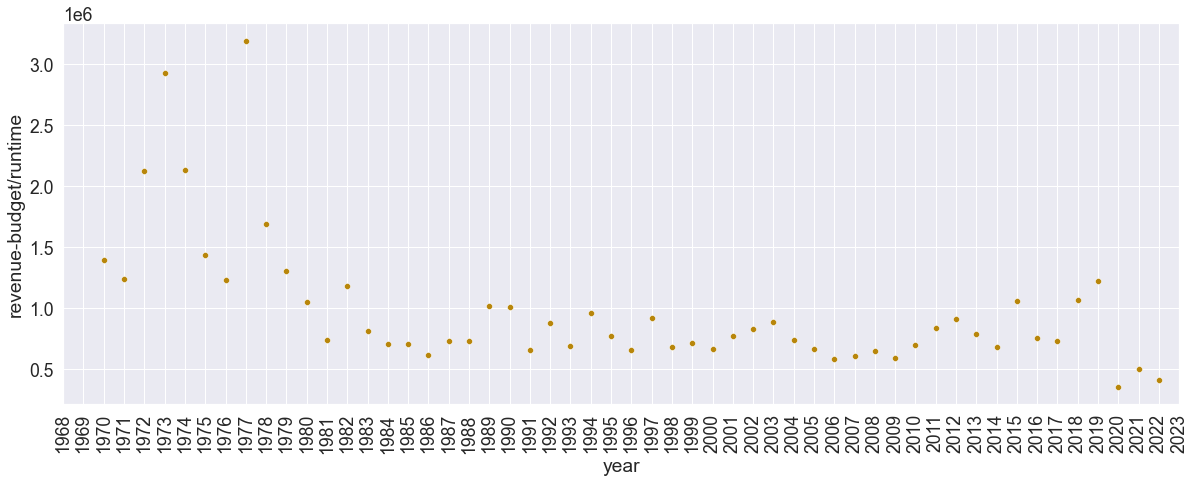

In [13]:
df_year = df.groupby("year").sum().reset_index()
df_year["revenue-budget/runtime"] = (df_year["revenue"] - df_year["budget"]) / df_year["runtime"]
plt.figure(figsize=(20,7))
ax = sns.scatterplot(data=df_year, x="year", y="revenue-budget/runtime", color="darkgoldenrod")
ax.set_xlim(1970,2022)
ax.set_xticks(range(1968,2024))
plt.xticks(rotation=90);

En los años 1971, 1973, 1974, y 1977, las películas tuvieron un mayor ingreso por minuto. Por otro lado, en los años 2020 y 2021 son los años con los menores ingresos, lo que se debe a la pandemia del COVID-19 que empezó el contagio a finales del 2019.

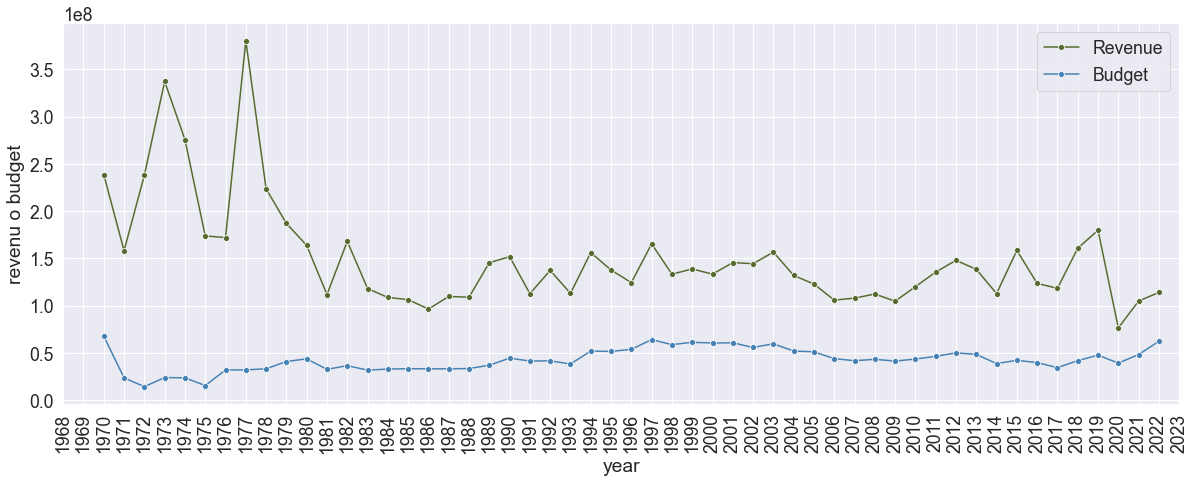

In [14]:
df_year_a = df.groupby("year").mean().reset_index()
plt.figure(figsize=(20,7))
ax = sns.lineplot(data=df_year_a, x="year", y="revenue", label="Revenue", marker='o', color="darkolivegreen")
ax2 = sns.lineplot(data=df_year_a, x="year", y="budget", label="Budget", marker='o', color="steelblue")
ax.set_xlim(1970,2022)
ax.set_xticks(range(1968,2024))
plt.legend(loc="upper right")
plt.xticks(rotation=90)
ax.set(ylabel="revenu o budget");

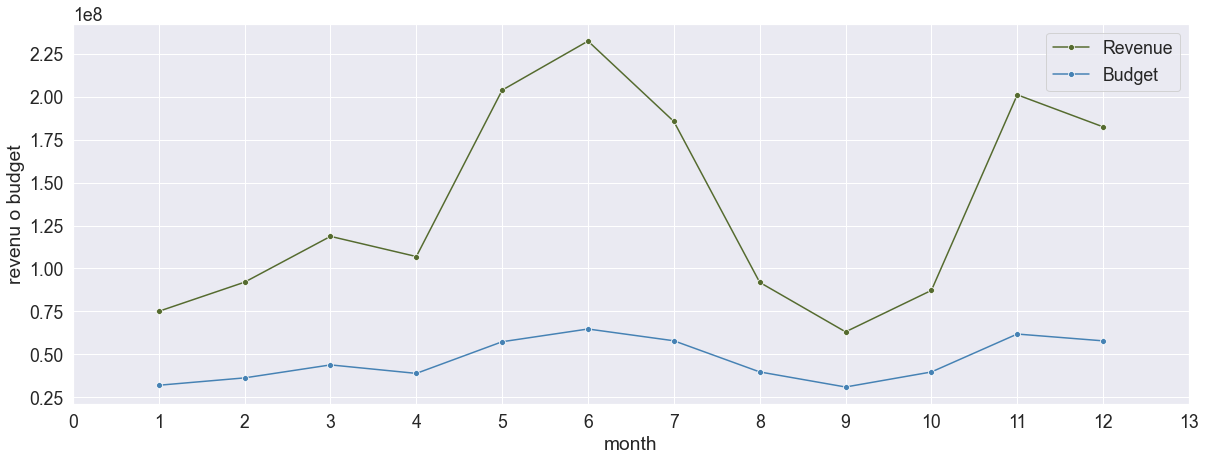

In [15]:
df_year_p = df.groupby("month").mean().reset_index()
plt.figure(figsize=(20,7))
ax = sns.lineplot(data=df_year_p, x="month", y="revenue", label="Revenue", marker='o',color="darkolivegreen")
ax2 = sns.lineplot(data=df_year_p, x="month", y="budget", label="Budget", marker='o', color="steelblue")
ax.set_xlim(0,12)
ax.set_xticks(range(0,14))
plt.legend(loc="upper right")
ax.set(ylabel="revenu o budget");

Las películas que se estrenaron en los meses de Mayo, Junio, Julio, Noviembre y Diciembre en los años de estudio (1970-2022), fueron las que obtuvieron mayores ingresos promedio.

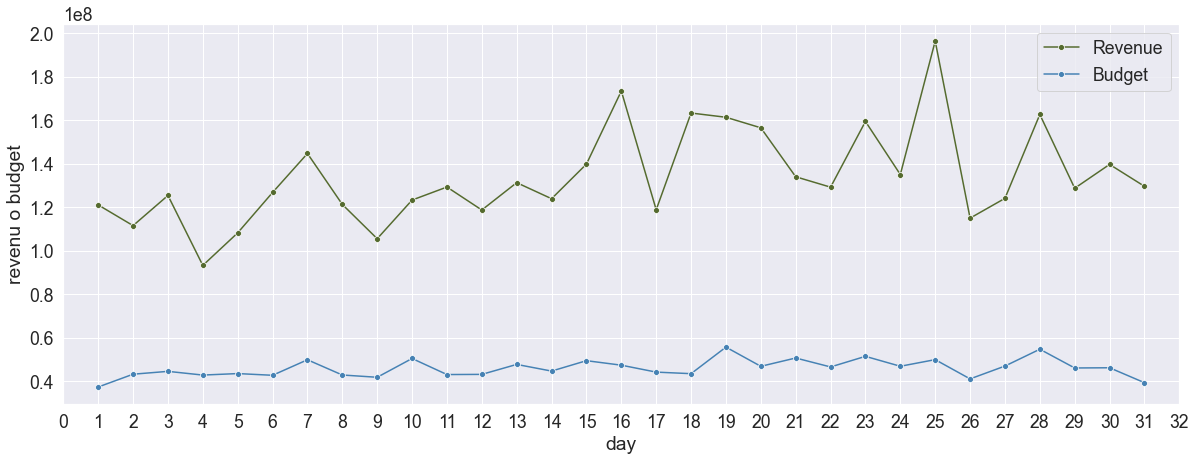

In [16]:
df_year_d = df.groupby("day").mean().reset_index()
plt.figure(figsize=(20,7))
ax = sns.lineplot(data=df_year_d, x="day", y="revenue", label="Revenue", marker='o', color="darkolivegreen")
ax2 = sns.lineplot(data=df_year_d, x="day", y="budget", label="Budget", marker='o', color="steelblue")
ax.set_xlim(0,12)
ax.set_xticks(range(0,33))
plt.legend(loc="upper right")
ax.set(ylabel="revenu o budget");

Con respecto al día de lanzamiento de la película, se observa que en el día 25 del mes, las películas tienen mayores ingresos en promedio con respecto a los demás días del mes.

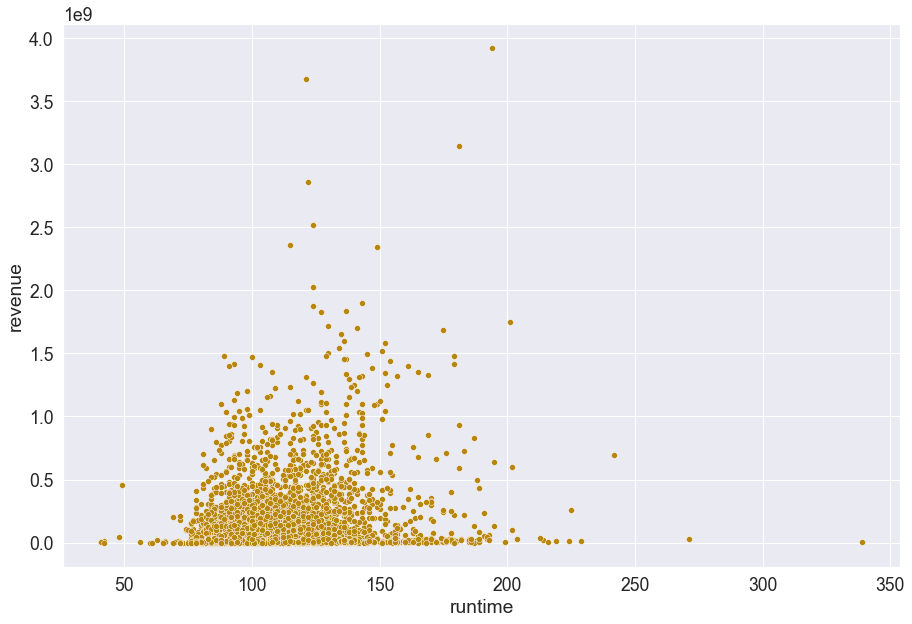

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="runtime", y="revenue", color = "darkgoldenrod");

De acuerdo el mapa de correlaciones, este no demuestra un correlación significativa entre revenue y runtime (0.21).

Las películas en promedio del genero Animation y Adeventure, en promedio son las que más ingresos promedio generán, contrario al género History, que son películas en promedio con mayor tiempo de duración y menos ingresos, y en el grupo Documentary, son aquellas con menos ingresos y menos tiempo de duración.

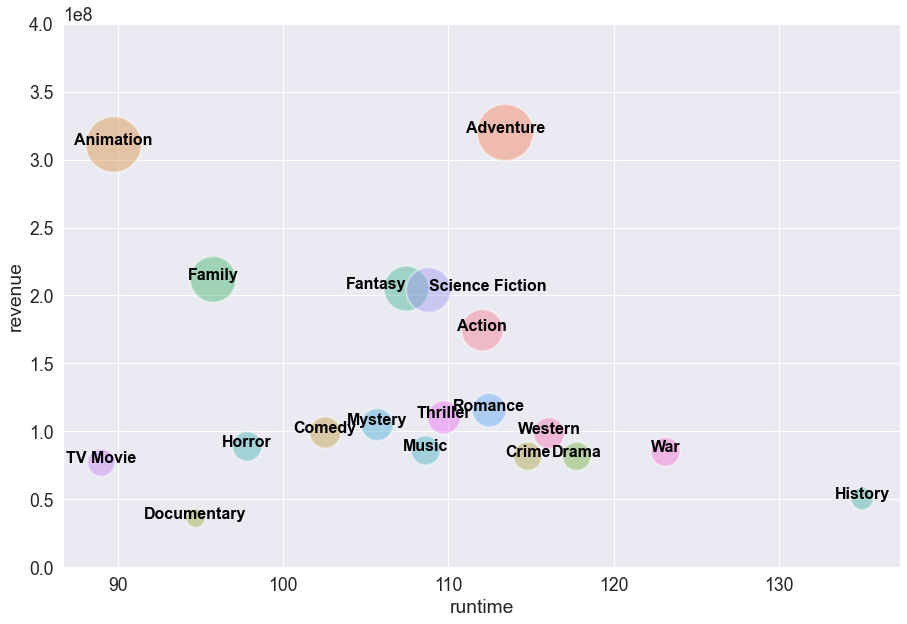

In [18]:
df_genres = df.groupby("genres").mean().reset_index()
plt.figure(figsize=(15, 10))
#plt.scatter(data = df_genres, x = "runtime", y = "revenue", cmap="Blues" , s = df_genres["revenue"].values/100000, c="darkolivegreen", alpha= 0.4)
ax = sns.scatterplot(data = df_genres, x = "runtime", y = "revenue", cmap="Blues" , s = df_genres["revenue"].values/100000, alpha= 0.4, hue="genres")
ax.set_ylim(0, 400000000)
plt.legend([],[], frameon=False)

for line in range(0,df_genres.shape[0]):
     if df_genres.genres[line] == "Fantasy":
          ax.text(df_genres.runtime[line], df_genres.revenue[line], df_genres.genres[line], horizontalalignment='right', size='small', color='black', weight='semibold')
     elif df_genres.genres[line] == "Science Fiction":
          ax.text(df_genres.runtime[line], df_genres.revenue[line], df_genres.genres[line], horizontalalignment='left', size='small', color='black', weight='semibold')
     else:
          ax.text(df_genres.runtime[line], df_genres.revenue[line], df_genres.genres[line], horizontalalignment='center', size='small', color='black', weight='semibold')

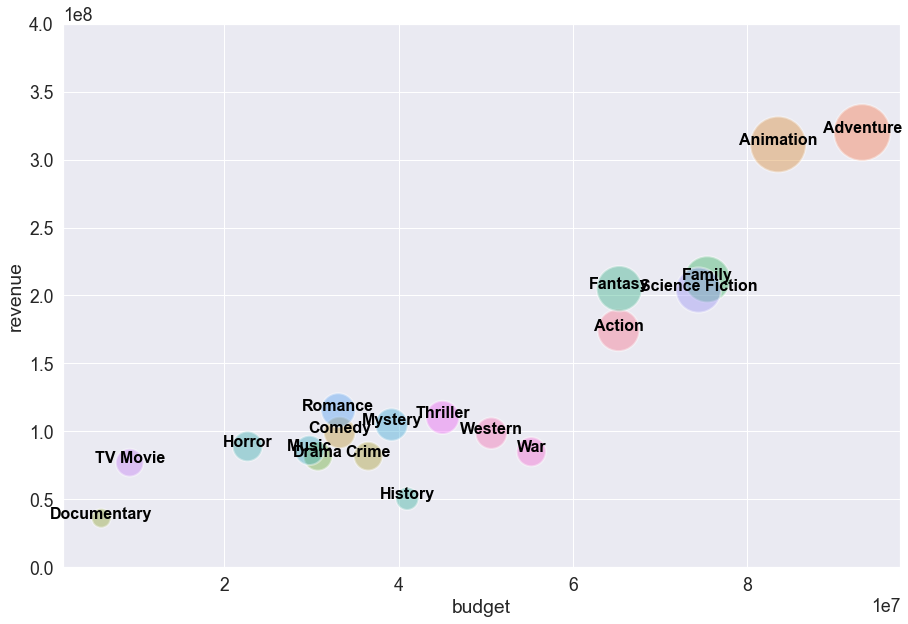

In [19]:
plt.figure(figsize=(15, 10))
#plt.scatter(data = df_genres, x = "runtime", y = "revenue", cmap="Blues" , s = df_genres["revenue"].values/100000, c="darkolivegreen", alpha= 0.4)
ax = sns.scatterplot(data = df_genres, x = "budget", y = "revenue", cmap="Blues" , s = df_genres["revenue"].values/100000, alpha= 0.4, hue="genres")
ax.set_ylim(0, 400000000)
plt.legend([],[], frameon=False)

for line in range(0,df_genres.shape[0]):
    ax.text(df_genres.budget[line], df_genres.revenue[line], df_genres.genres[line], horizontalalignment='center', size='small', color='black', weight='semibold')

Por la misma tendencia, los géneros Animation y Adventure son películas que generan mayores ingresos de taquilla en promedio, y mayor budget. Mientras que TV Movie y Documentary, lo contrario.

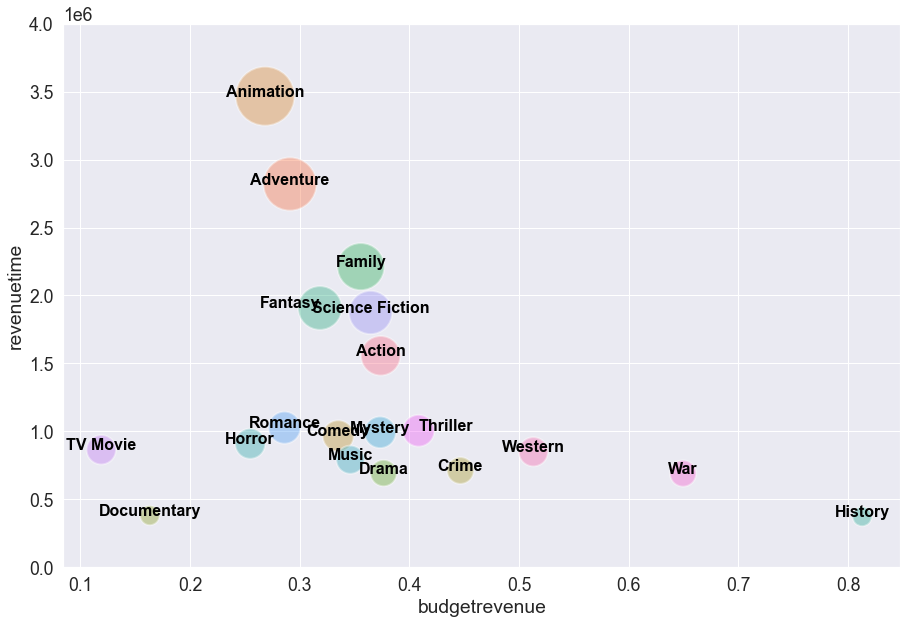

In [20]:
df_genres_s = df.groupby("genres").sum().reset_index()
df_genres_s["revenuetime"] = df_genres_s["revenue"] / df_genres_s["runtime"]
df_genres_s["budgetrevenue"] = df_genres_s["budget"] / df_genres_s["revenue"]
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(data = df_genres_s, x = "budgetrevenue", y = "revenuetime", cmap="Blues" , s = df_genres_s["revenuetime"].values/1000, alpha= 0.4, hue="genres")
ax.set_ylim(0, 4000000)
plt.legend([],[], frameon=False)

for line in range(0,df_genres_s.shape[0]):
    if df_genres_s.genres[line] == "Thriller" or df_genres_s.genres[line] == "Science Ficton":
        ax.text(df_genres_s.budgetrevenue[line], df_genres_s.revenuetime[line], df_genres_s.genres[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    elif df_genres_s.genres[line] == "Fantasy":
        ax.text(df_genres_s.budgetrevenue[line], df_genres_s.revenuetime[line], df_genres_s.genres[line], horizontalalignment='right', size='small', color='black', weight='semibold')
    else:
        ax.text(df_genres_s.budgetrevenue[line], df_genres_s.revenuetime[line], df_genres_s.genres[line], horizontalalignment='center', size='small', color='black', weight='semibold')

Las peliculas de Acción, es el sexto genero con mayores ingresos promedio por minuto de duración de película, y el decimo segundo género, en que la proporción o procentaje del presupuesto con respecto al ingresos promedio de taquilla. 

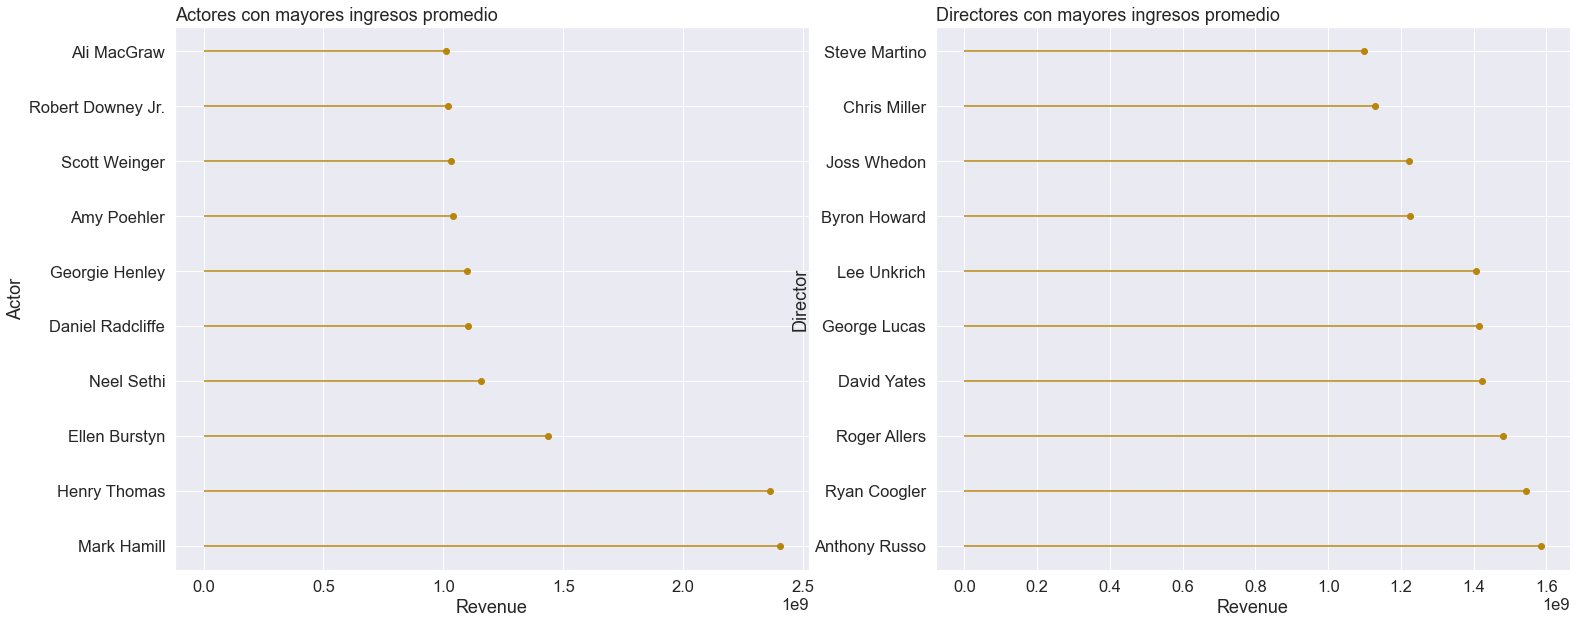

In [21]:
sns.set(font_scale =1.5)
df_actors_s = df.groupby("cast").mean().sort_values(by=("revenue"), ascending=False).reset_index().head(10)
fig, axes = plt.subplots(1, 2, figsize= (25,10))

range_l=range(1,len(df_actors_s)+1)
axes[0].hlines(y=range_l, xmin=0, xmax=df_actors_s['revenue'], color = "darkgoldenrod")
axes[0].scatter(df_actors_s['revenue'], range_l,alpha=1, color = "darkgoldenrod")
plt.sca(axes[0])
plt.yticks(range_l, df_actors_s['cast'])
plt.title("Actores con mayores ingresos promedio", loc='left')
plt.xlabel('Revenue')
plt.ylabel('Actor')

df_directores_m = df.groupby("crew").mean().sort_values(by=("revenue"), ascending=False).reset_index().head(10)
range_l=range(1,len(df_directores_m)+1)
axes[1].hlines(y=range_l, xmin=0, xmax=df_directores_m['revenue'], color = "darkgoldenrod")
axes[1].scatter(df_directores_m['revenue'], range_l,alpha=1, color = "darkgoldenrod")
plt.sca(axes[1])
plt.yticks(range_l, df_directores_m['crew'])
plt.title("Directores con mayores ingresos promedio", loc='left')
plt.xlabel('Revenue')
plt.ylabel('Director');


Anthony Ruso y Mark Hamill, son el director y el actor protagonista que trabajaron en las películas con mayores ingresos de taquilla en promedio. Pero con respecto al siguiente gráfico de burbujas en el que Roger Allers, es el director que en las películas que ha dirigido, estas tuvieron un mayor ingreso por cada minuto de duración de todas las películas, y con menor procentaje de presupuesto sobre el ingreso de taquilla total.

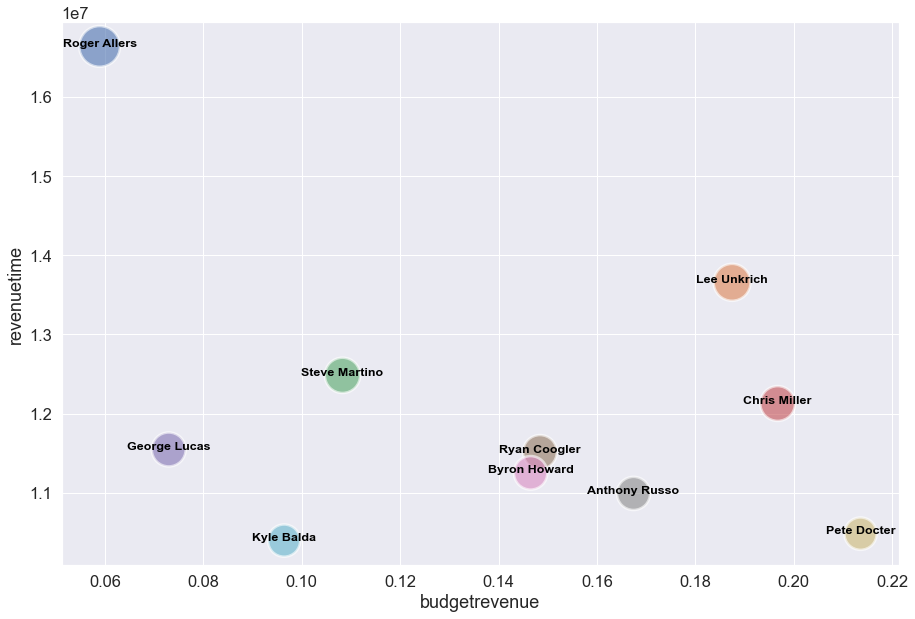

In [22]:
df_directores_s = df.groupby("crew").sum().reset_index()
df_directores_s["revenuetime"] = df_directores_s["revenue"] / df_directores_s["runtime"]
df_directores_s["budgetrevenue"] = df_directores_s["budget"] / df_directores_s["revenue"]
df_directores_s = df_directores_s.sort_values(by=["revenuetime"], ascending=False).head(10).reset_index(drop=True)

plt.figure(figsize=(15, 10))
ax = sns.scatterplot(data = df_directores_s, x = "budgetrevenue", y = "revenuetime", cmap="Blues" , s = df_directores_s["revenuetime"].values/10000, alpha= 0.6, hue="crew")
#ax.set_ylim(0, 4000000)
plt.legend([],[], frameon=False)

for line in range(0,df_directores_s.shape[0]):
    ax.text(df_directores_s.budgetrevenue[line], df_directores_s.revenuetime[line], df_directores_s.crew[line], horizontalalignment='center', size='x-small', color='black', weight='semibold')

- Películas con mayor ingreso constan de más presupuesto, correlación significativa enre presupuesto e ingresos de taquilla (mayor a 0.5)
- EL ingreso de taquilla en promedio de las películas que se estrenaron en los años 2020 y 2021, son los menores con respecto a los demás años
- Películas que se estrenaron a mitad y a fin de año, obtuvieron mayores ingresos.
- El genero de accion genera más ganancias.

PAra concluir, se corroboro de las hipotésis lo siguiente:

- Se pudo observar una correlación significativa (0.62) entre el presupuesto y los ingresos de las películas.
- En los años 2020 y 2021, debido a la pandemia hubo una caída en los ingresos de taquilla de las películas que se lanzaron dichos años.
- Películas que se estrenaron en los meses Mayo, Junio, Julio, Noviembre Y Diciembre generaron en promedio más ingresos.
- Aventura y Animación son los genereos con maoyores ingresos en promedio, mientras que Acción es el sexto género.